<a href="https://colab.research.google.com/github/ah1997/python_plotting/blob/main/pythonhistogram1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   Histograms in Python

Animesh Hazra \\
Date : 14/12/2021



Reference:
- https://www.datacamp.com/community/tutorials/histograms-matplotlib
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=np.array([np.random.randn() for i in range(1000)])

## Simple way: hist function

The function hist is part of the Matplotlib library. By default, hist gives the histogram values in addition to the plot.

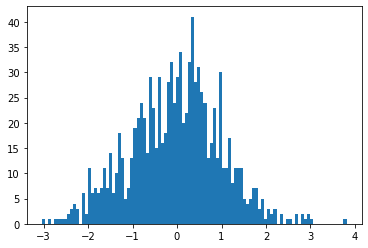

In [ ]:
plt.hist(data,100)
plt.show()

To only get the plot, use the show command. Also use the 'density' option to make sure the histogram is normalised as a probability density.

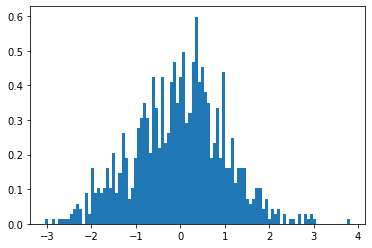

In [ ]:
plt.hist(data, 100, density=True)
plt.show()

In [ ]:
data2 = np.array([np.random.randn() for i in range(10000000)])

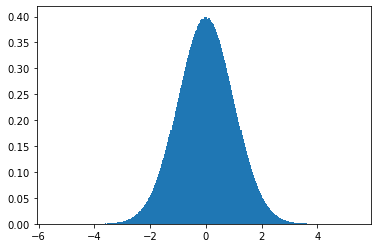

In [ ]:
plt.hist(data2, 300, density=True)
plt.show()

## Better way: histogram function

Numpy has a histogram command which is quite comprehensive:

In [ ]:
np.histogram(data, 10)

(array([  5,  17,  59, 145, 234, 236, 195,  70,  35,   4]),
 array([-3.25278414, -2.61526365, -1.97774315, -1.34022265, -0.70270216,
        -0.06518166,  0.57233883,  1.20985933,  1.84737983,  2.48490032,
         3.12242082]))

The first array is the bin counts, not normalised. The second array contains the $n+1$ points that specify the bases of the $n$ bins we want, so that array has one more point than the bin count array. With this in mind, here's how we can plot the result as a bar chart:

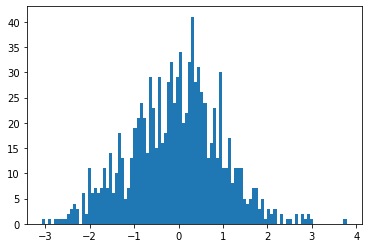

In [ ]:
nbins = 100
hist, bin_spec = np.histogram(data, nbins)
a, b = min(bin_spec), max(bin_spec)
dx = (b-a)/nbins
plt.bar(bin_spec[:-1], hist, width = dx)
plt.show()

The directive bin_spec[:-1] takes all elements except the last, so we are positioning the bins with the left coordinates. To position the bins with center points, push the position by $dx/2$:

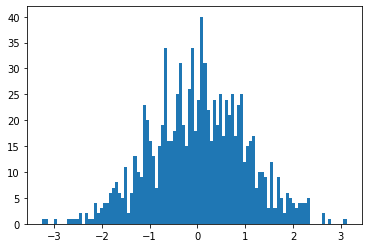

In [ ]:
nbins = 100
hist, bin_spec = np.histogram(data, nbins)
a, b = min(bin_spec), max(bin_spec)
dx = (b-a)/nbins
plt.bar(bin_spec[:-1]+dx/2.0, hist, width = dx)
plt.show()

As it is, the histogram is not normalised as a probability density. To force that normalisation, use again the 'density' option:

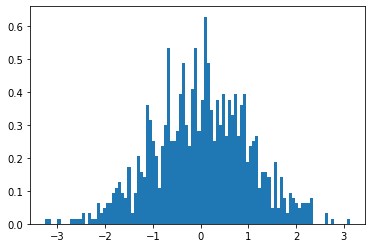

In [ ]:
nbins = 100
hist, bin_spec = np.histogram(data, nbins, density=True)
a, b = min(bin_spec), max(bin_spec)
dx = (b-a)/nbins
plt.bar(bin_spec[:-1]+dx/2.0, hist, width = dx)
plt.show()

# Step and triangular profile

# Sine wave production

- $P_y = A(3+2sin(\frac{2\pi y}{L})$ \\
 where A = Normalisation constant
- $\int_{0}^{L}P_y dy = 1 $
$\Rightarrow A = \frac{1}{3L}$
So,
- $P_y = \frac{1}{3L}\big(3+2sin(\frac{2\pi y}{L})\big)$ \\
- $x = \frac{1}{3L}\big[3y +\frac{L}{\pi}\big( 1 - cos(\frac{2\pi y}{L} \big) \big]$ \\
- $\Rightarrow 3y - cos(\frac{2\pi y}{L}\big) = 3xL - \frac{L}{\pi}$

In [2]:
#import module
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

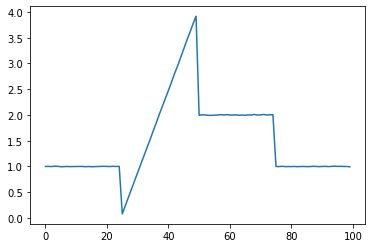

In [3]:
L = 100
Emax = 100000
nx = np.zeros(L)
@jit
def ini(Emax,L):
  n1 = L/4
  n2 = int(L/2)
  nx = np.zeros(L)
  for _ in range(Emax):
      for i in range(n1):
          j = int(np.random.random()*L/4)
          j1 = int(np.random.random()*(L/4)+3*L/4)
          nx[j] += 1
          nx[j1] += 1
      for i in range(n2):
          j = int(np.sqrt(np.random.random())*L/4+L/4)
          nx[j] += 1
          j1 = int((np.random.random())*L/4+L/2)
          nx[j1] += 1 
  return nx/Emax
t0 = ini(Emax,L)
plt.plot(t0)

In [3]:
dir(np)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'Bytes0',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'Datetime64',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Str0',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'Uint64',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__deprecated_attrs__',
 '__dir__',
 '__doc__',
 '__expired_functions__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',


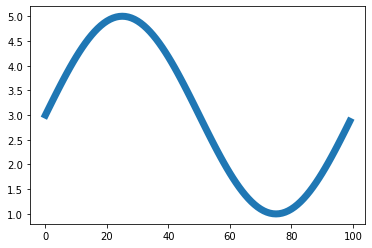

300.0


In [ ]:
L = 100 
x1 = np.arange(0,L,1)
y1 = (3+2*np.sin(2*np.pi*x1/L))
plt.plot(x1 , y1 ,linewidth=7.0)
plt.show()
print(y1.sum())

In [ ]:
# creating data set
data_sin = []
L = 10 
for _ in range(1000):
  x = np.random.random()
  y = 1/(3*L)*(3*x+L/(np.pi)*(1-np.cos(2*np.pi*x/L)))
  data_sin.append(y)

In [ ]:
data_sin

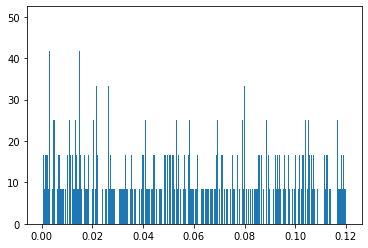

In [ ]:
# plotting histograme
plt.hist(data_sin, 1000, density=True)
plt.show()